In [2]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import util
from timeit import default_timer as timer
# set a results file
logger = util.result(path="", file="results.logs")
logger.propagate = False

<h3 style="color: #dddda1">Pull configs and set defaults</h3>

In [3]:
files = util.get_config_values("files")
validation_types = util.get_config_values("validation_types")
split_types = util.get_config_values("split_types")
split_size = util.get_config_values("split_size")
preprocessors = util.get_config_values("preprocessors")
models = util.get_config_values("models")
evaluators = util.get_config_values("evaluators")
pls_max_n_comp = util.get_config_values("general", list_type=False, key="pls_max_n_comp")
folds = util.get_config_values("general", list_type=False, key="folds")
wl = np.arange(880,2210,5.2) # Set wavelength range
pipeline_run_types = util.get_config_values("pipeline_run_types")

<h3 style="color: #00faaa">Running pipeline (preprocessor only) for all preprocessors</h3>

In [10]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files[3]

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]), showDataEDA=False)

# Run pipeline in loop for all preprocessors combinations OR
# For selected preprocessors only, you can run the loop using a slice from the whole preprocessors list variable.
# To check which slice you want, check the configfile.ini file
for index, val in enumerate(preprocessors):
    if index in [0, 5, 8]:
        derivative = 0
    elif index in [1, 6, 9]:
        derivative = 1
    elif index in [2, 7, 10]:
        derivative = 2

    # Ideally not required to change anything here.
    # But you can change the derivative explicitly as per your choice (0,1 or 2)
    preprocessor_params = {
        'savgol' : {
            'window_size_range' : np.arange(3,63,3),
            'polyorder_range' : np.arange(2,18,2),
            'derivative' : derivative
        }
    }

    # Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
    # Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
    # Set models[0] for PLS and models[1] for LASSO
    # evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
    # preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
    # preprocessor-params: only required for SavGol and its related combos.
    # pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
    pipeline_params = {
        'logger' : logger,
        'data' : data,
        'validation-type' : validation_types[0],
        'preprocessor' : val,
        'preprocessor-params' : preprocessor_params,
        'model' : models[0],
        'evaluator' : evaluators[0],
        'pls_max_n_comp' : int(pls_max_n_comp),
        'folds' : int(folds),
        'wl' : wl,
        'plotting' : False,
        'showModelEvaluationPlots' : True,
        'pipeline_run_type' : pipeline_run_types[0]
    }

    start = timer()
    logger.info("************************************")
    logger.info("Pipeline Start...")
    logger.info("Pipeline params :")
    logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
                + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
    logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
                + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
    util.pipeline(pipeline_params)
    end = timer()
    logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
    logger.info("Pipeline end...")
    logger.info("************************************")

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : savgol0, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO Least MSE from SAVGOL loop run 1.9060651086990832
INFO Best window size 9
INFO Best polyorder 8
INFO Elapsed time for pipeline run : 5.35
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : savgol1, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO Least MSE from SAVGOL loop run 1.0526063565890384
INFO Best window size 48
INFO Best polyorder 2
INFO Elapsed time for pipeline run : 5.01
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline S

<h3 style="color: #00faaa">Running pipeline (total) for only Savgol1, SNV, MSC, Savgol1+SNV, Savgol1+MSC</h3>
<h5 style="color: white">Train/Test split - 80/20 OR 70/30 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - KFolds CV, folds=5</h5>
<h5 style="color: white">Spectrum - 1 day</h5>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : savgol1, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5


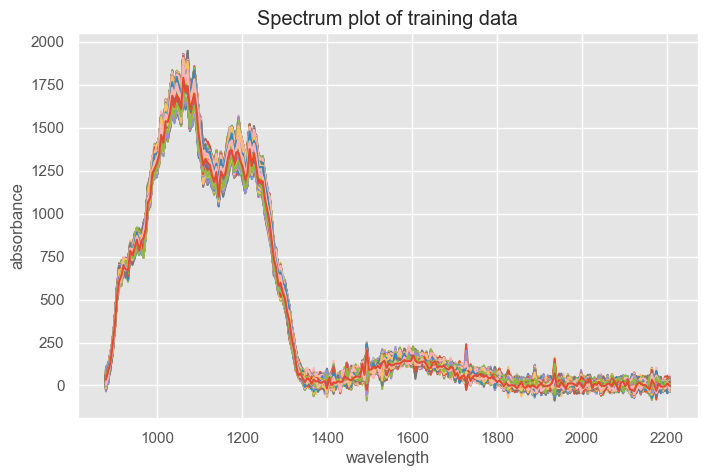

INFO [PRE PROCESSING]


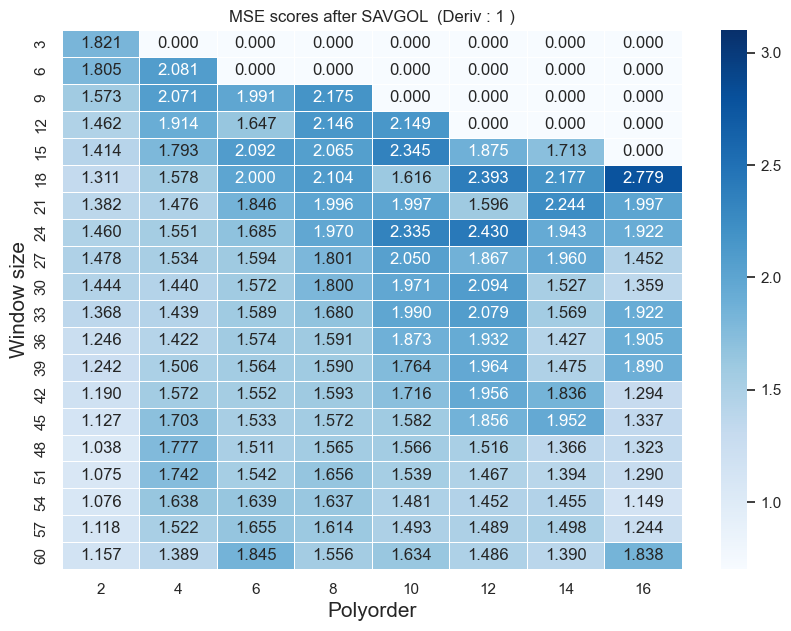

INFO Least MSE from SAVGOL loop run 1.0377611134274045
INFO Best window size 48
INFO Best polyorder 2


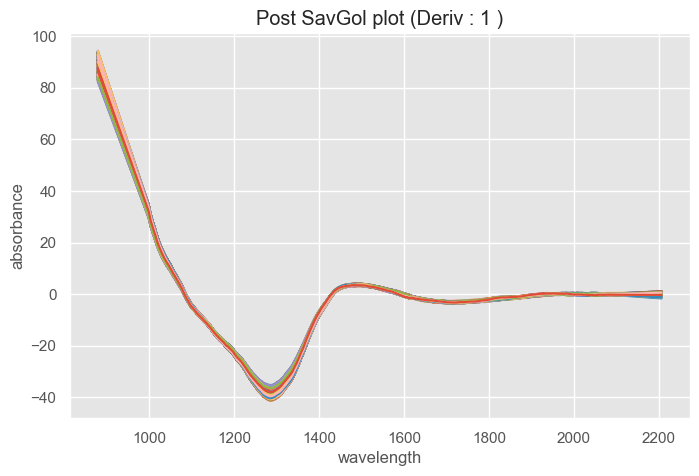

INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 



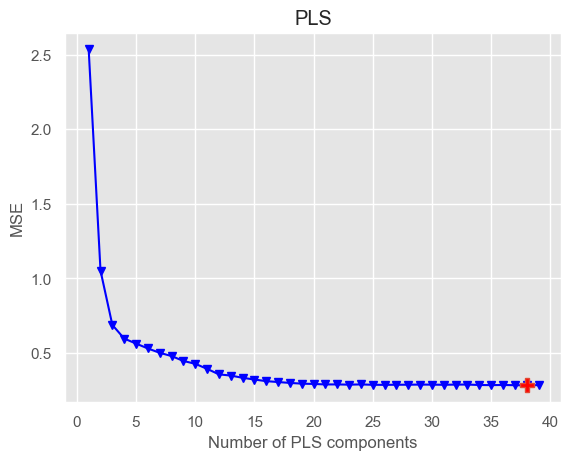

INFO Optimized n_comp for PLS 38
INFO [MODEL EVALUATION]


[Model Evaluation] MSE value between y_test and y_pred : 0.270


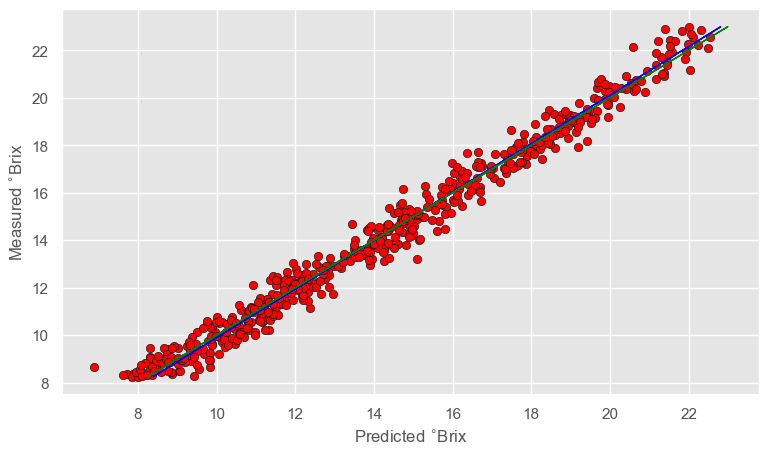

INFO Model loss : 0.2696739967592747
INFO Elapsed time for pipeline run : 15.24
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5


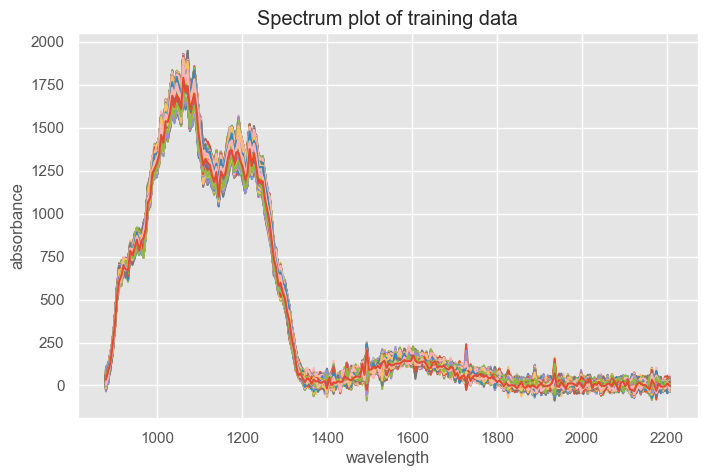

INFO [PRE PROCESSING]


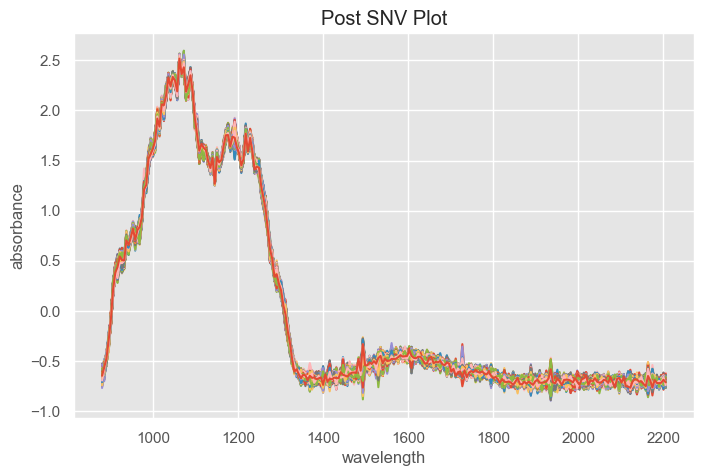

INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 



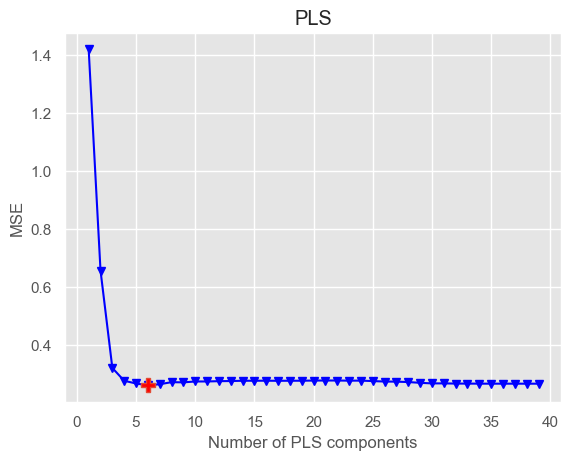

INFO Optimized n_comp for PLS 6
INFO [MODEL EVALUATION]


[Model Evaluation] MSE value between y_test and y_pred : 0.239


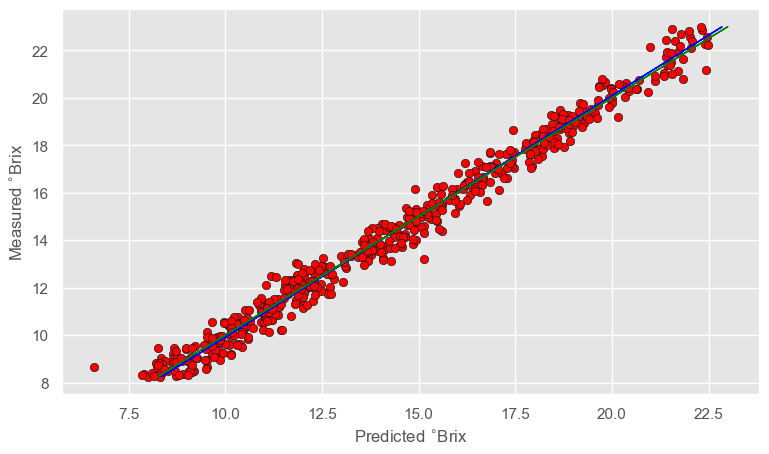

INFO Model loss : 0.23920540709396393
INFO Elapsed time for pipeline run : 11.56
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : msc, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5


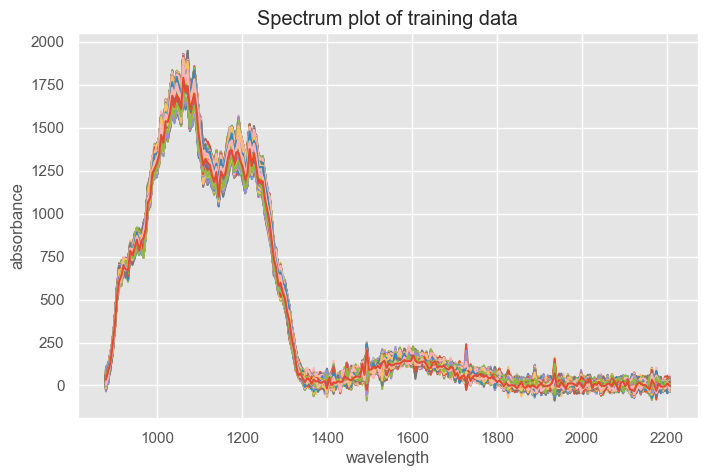

INFO [PRE PROCESSING]


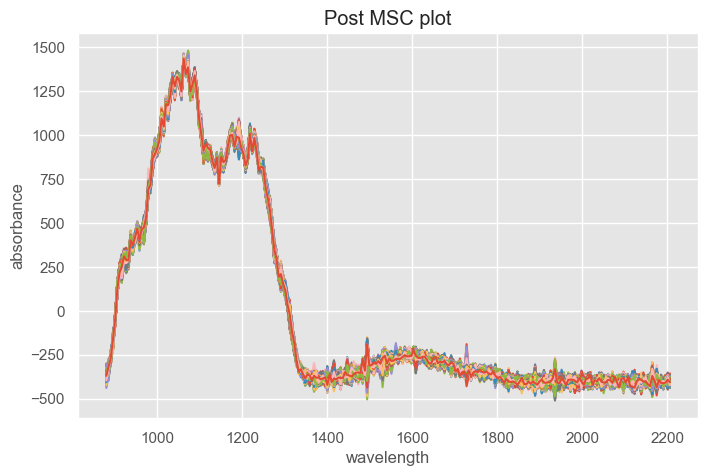

INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 



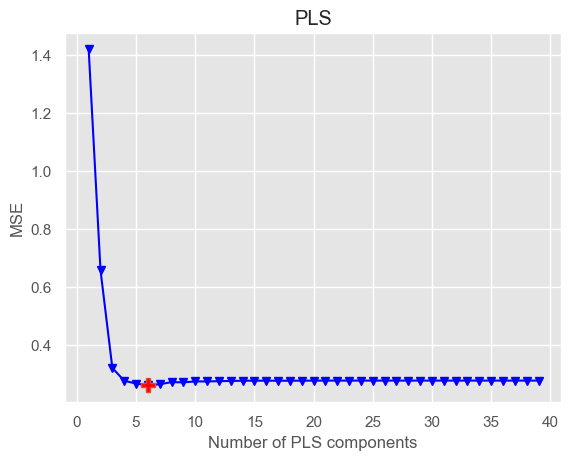

INFO Optimized n_comp for PLS 6
INFO [MODEL EVALUATION]


[Model Evaluation] MSE value between y_test and y_pred : 0.239


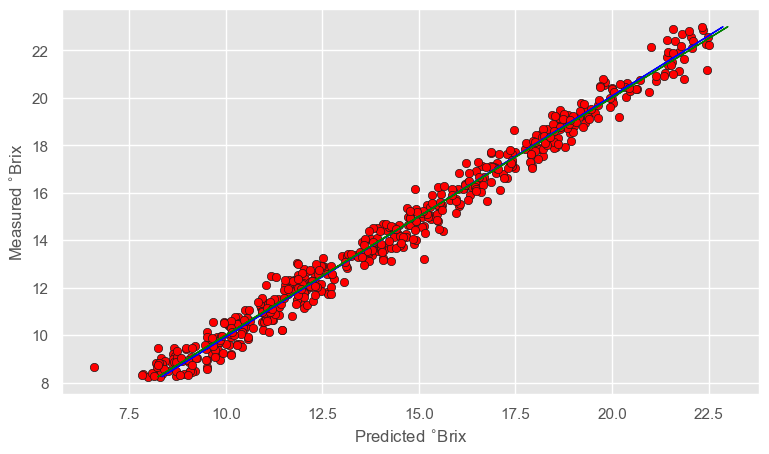

INFO Model loss : 0.23930552836906666
INFO Elapsed time for pipeline run : 10.1
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : savgol1+snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5


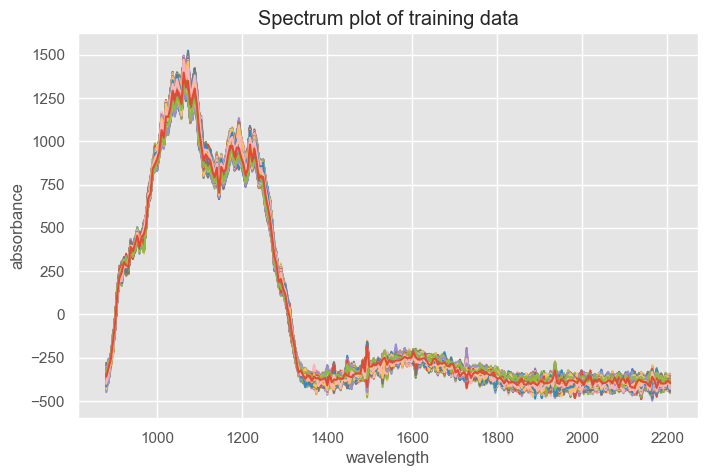

INFO [PRE PROCESSING]


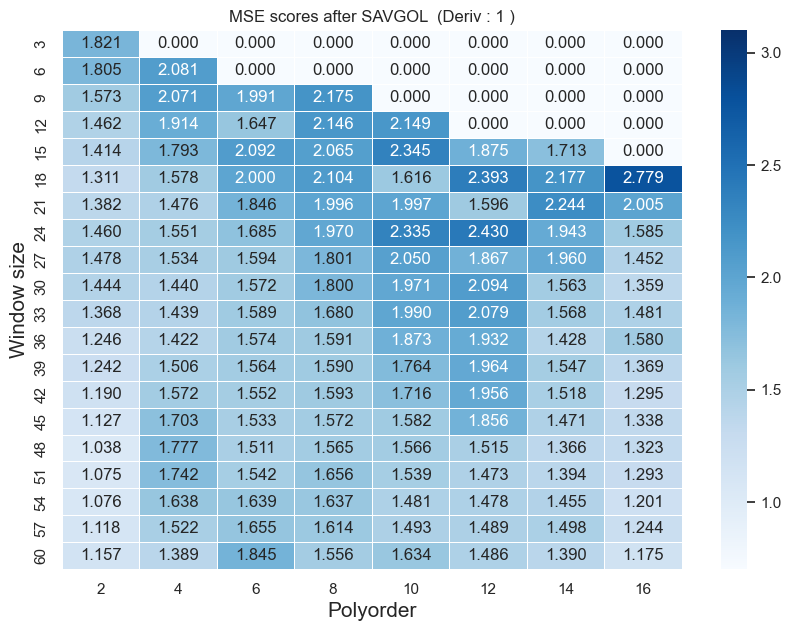

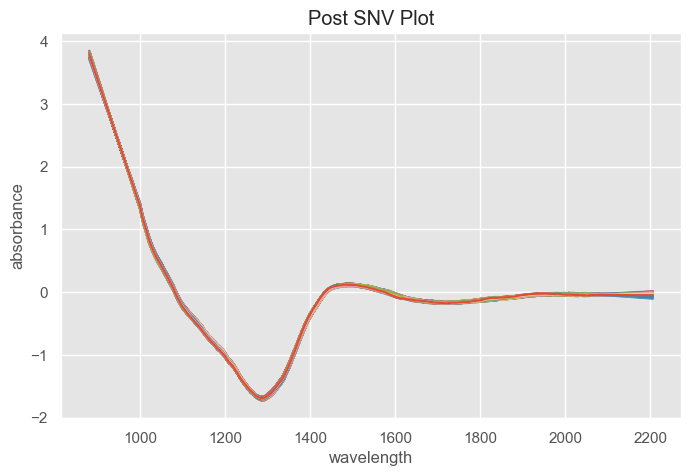

INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 



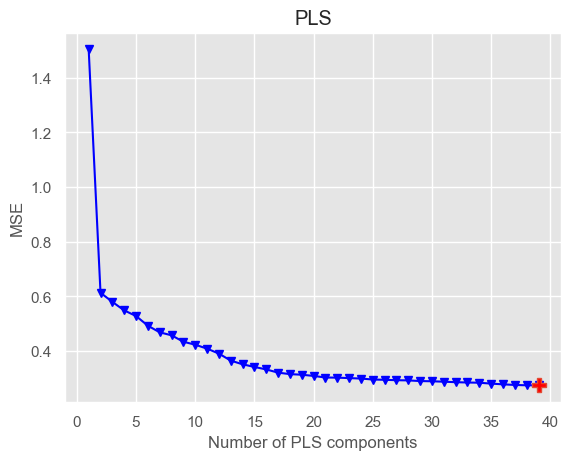

INFO Optimized n_comp for PLS 39
INFO [MODEL EVALUATION]


[Model Evaluation] MSE value between y_test and y_pred : 0.268


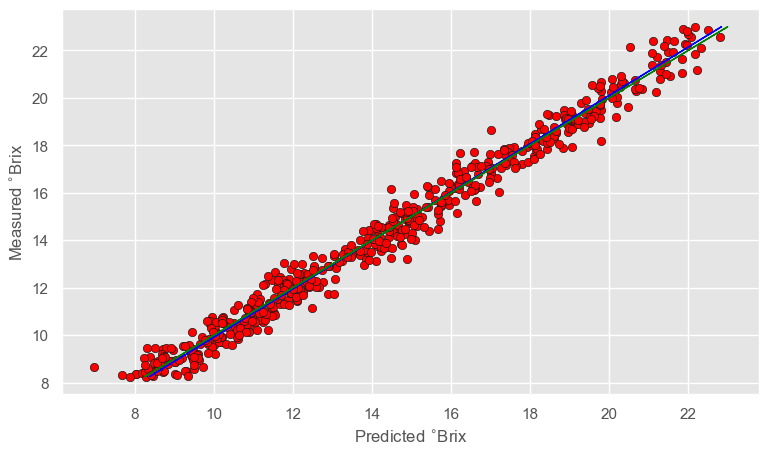

INFO Model loss : 0.2679356731489718
INFO Elapsed time for pipeline run : 14.23
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : savgol1+msc, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5


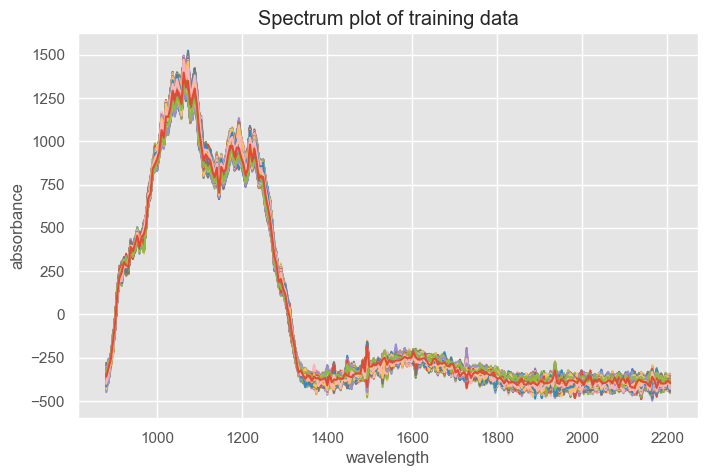

INFO [PRE PROCESSING]


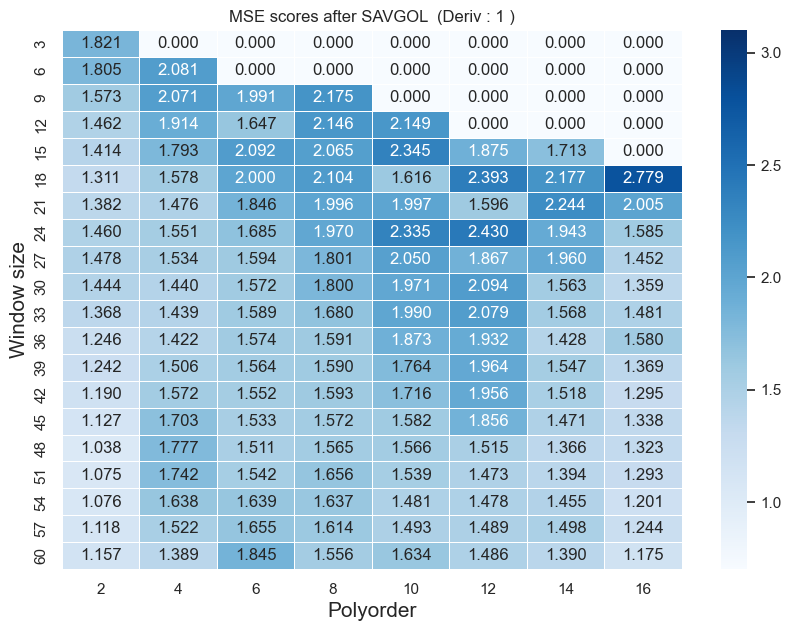

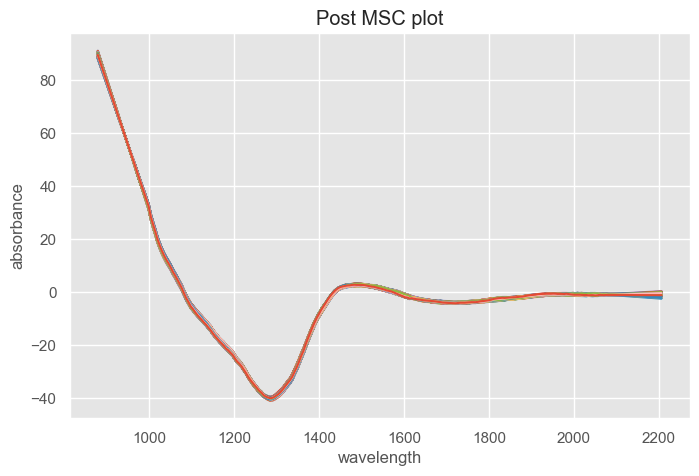

INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 



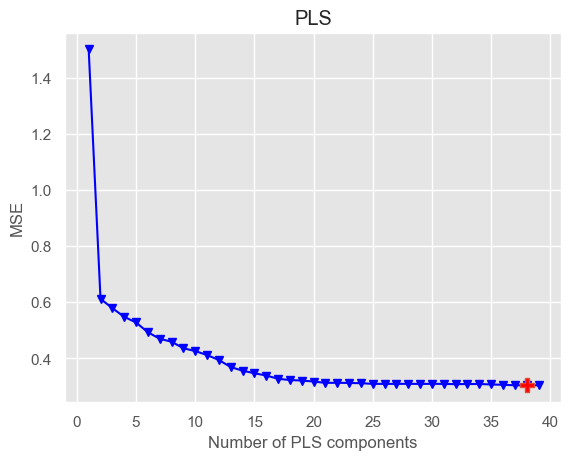

INFO Optimized n_comp for PLS 38
INFO [MODEL EVALUATION]


[Model Evaluation] MSE value between y_test and y_pred : 0.371


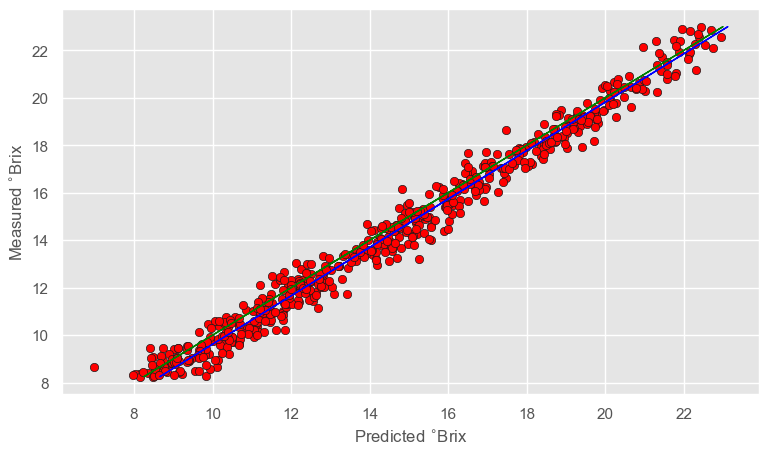

INFO Model loss : 0.37064279929985205
INFO Elapsed time for pipeline run : 14.53
INFO Pipeline end...
INFO ************************************


In [3]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files[0]

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[1]), showDataEDA=False)

# Run pipeline in loop for all preprocessors combinations OR
# For selected preprocessors only, you can run the loop using a slice from the whole preprocessors list variable.
# To check which slice you want, check the configfile.ini file
for index, val in enumerate(preprocessors):
    if index in [1, 3, 4, 6, 9]:     # selecting only the required preprocessors

        # Ideally not required to change anything here.
        # But you can change the derivative explicitly as per your choice (0,1 or 2)
        preprocessor_params = {
            'savgol' : {
                'window_size_range' : np.arange(3,63,3),
                'polyorder_range' : np.arange(2,18,2),
                'derivative' : 1
            }
        }

        # Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
        # Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
        # Set models[0] for PLS and models[1] for LASSO
        # evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
        # preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
        # preprocessor-params: only required for SavGol and its related combos.
        # pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
        pipeline_params = {
            'logger' : logger,
            'data' : data,
            'validation-type' : validation_types[0],
            'preprocessor' : val,
            'preprocessor-params' : preprocessor_params,
            'model' : models[0],
            'evaluator' : evaluators[0],
            'pls_max_n_comp' : int(pls_max_n_comp),
            'folds' : int(folds),
            'wl' : wl,
            'plotting' : True,
            'showModelEvaluationPlots' : True,
            'pipeline_run_type' : pipeline_run_types[1]
        }

        start = timer()
        logger.info("************************************")
        logger.info("Pipeline Start...")
        logger.info("Pipeline params :")
        logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
                    + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
        logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
                    + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
        util.pipeline(pipeline_params)
        end = timer()
        logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
        logger.info("Pipeline end...")
        logger.info("************************************")

<h3 style="color: #00faaa">Running pipeline (total) - comparison of varying data size and train/test split size</h3>
<h5 style="color: white">Preprocessors - SNV, MSC</h5>
<h5 style="color: white">Train/Test split - 85/15 OR 75/25 OR 50/50 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - KFolds CV, folds=5</h5>
<h5 style="color: white">Spectrum - (2-4) days (needs to be set in params)</h5>

In [16]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[5]), showDataEDA=False)

# Run pipeline in loop for all preprocessors combinations OR
# For selected preprocessors only, you can run the loop using a slice from the whole preprocessors list variable.
# To check which slice you want, check the configfile.ini file
for index, val in enumerate(preprocessors):
    if index in [3, 4]:     # selecting only SNV and MSC

        # Not required here.
        preprocessor_params = {
            'savgol' : {
                'window_size_range' : np.arange(3,63,3),
                'polyorder_range' : np.arange(2,18,2),
                'derivative' : 1
            }
        }

        # Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
        # Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
        # Set models[0] for PLS and models[1] for LASSO
        # evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
        # preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
        # preprocessor-params: only required for SavGol and its related combos.
        # pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
        pipeline_params = {
            'logger' : logger,
            'data' : data,
            'validation-type' : validation_types[0],
            'preprocessor' : val,
            'preprocessor-params' : preprocessor_params,
            'model' : models[0],
            'evaluator' : evaluators[0],
            'pls_max_n_comp' : int(pls_max_n_comp),
            'folds' : int(folds),
            'wl' : wl,
            'plotting' : False,
            'showModelEvaluationPlots' : False,
            'pipeline_run_type' : pipeline_run_types[1]
        }

        start = timer()
        logger.info("************************************")
        logger.info("Pipeline Start...")
        logger.info("Pipeline params :")
        logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
                    + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
        logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
                    + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
        util.pipeline(pipeline_params)
        end = timer()
        logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
        logger.info("Pipeline end...")
        logger.info("************************************")

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv', '2022_06_24.csv', '2022_06_29.csv'] , Preprocessor : snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 37
INFO [MODEL EVALUATION]


INFO Model loss : 0.45296587694180257
INFO Elapsed time for pipeline run : 29.13
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv', '2022_06_24.csv', '2022_06_29.csv'] , Preprocessor : msc, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5
INFO [PRE PROCESSING]


[Model Evaluation] MSE value between y_test and y_pred : 0.453


INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 24
INFO [MODEL EVALUATION]


INFO Model loss : 0.5045237388489686
INFO Elapsed time for pipeline run : 29.66
INFO Pipeline end...
INFO ************************************


[Model Evaluation] MSE value between y_test and y_pred : 0.505


<h3 style="color: #00faaa">Running pipeline (total) - Comparison of different train/test split sizes</h3>
<h5 style="color: white">Preprocessors - Savgol1, SNV, MSC, Savgol1+SNV, Savgol1+MSC</h5>
<h5 style="color: white">Train/Test split - 85/15 OR 75/25 OR 50/50 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - KFolds CV, folds=5</h5>
<h5 style="color: white">Spectrum - 4 days</h5>

In [11]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files[1]

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[2]), showDataEDA=False)

# Run pipeline in loop for all preprocessors combinations OR
# For selected preprocessors only, you can run the loop using a slice from the whole preprocessors list variable.
# To check which slice you want, check the configfile.ini file
for index, val in enumerate(preprocessors):
    if index in [3]:     # selecting only the required preprocessors

        # Ideally not required to change anything here.
        # But you can change the derivative explicitly as per your choice (0,1 or 2)
        preprocessor_params = {
            'savgol' : {
                'window_size_range' : np.arange(3,63,3),
                'polyorder_range' : np.arange(2,18,2),
                'derivative' : 1
            }
        }

        # Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
        # Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
        # Set models[0] for PLS and models[1] for LASSO
        # evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
        # preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
        # preprocessor-params: only required for SavGol and its related combos.
        # pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
        pipeline_params = {
            'logger' : logger,
            'data' : data,
            'validation-type' : validation_types[0],
            'preprocessor' : val,
            'preprocessor-params' : preprocessor_params,
            'model' : models[0],
            'evaluator' : evaluators[0],
            'pls_max_n_comp' : int(pls_max_n_comp),
            'folds' : int(folds),
            'wl' : wl,
            'plotting' : False,
            'showModelEvaluationPlots' : False,
            'pipeline_run_type' : pipeline_run_types[1]
        }

        start = timer()
        logger.info("************************************")
        logger.info("Pipeline Start...")
        logger.info("Pipeline params :")
        logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
                    + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
        logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
                    + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
        util.pipeline(pipeline_params)
        end = timer()
        logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
        logger.info("Pipeline end...")
        logger.info("************************************")

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_22.csv , Preprocessor : snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 6
INFO [MODEL EVALUATION]
INFO Model loss : 0.2279616770119425
INFO Elapsed time for pipeline run : 7.92
INFO Pipeline end...
INFO ************************************




[Model Evaluation] MSE value between y_test and y_pred : 0.228


<h3 style="color: #00faaa">Running pipeline (total) - comparison of cross validation methods</h3>
<h5 style="color: white">Preprocessors - SNV, MSC, Savgol1 + SNV</h5>
<h5 style="color: white">Train/Test split - 75/25 OR 50/50 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - KFolds CV OR Stratified KFolds CV OR Repeated KFolds CV, folds=5</h5>
<h5 style="color: white">Spectrum - 2 days OR 4 days (needs to be set in params)</h5>

In [ ]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[5]), showDataEDA=False)

# Run pipeline in loop for all preprocessors combinations OR
# For selected preprocessors only, you can run the loop using a slice from the whole preprocessors list variable.
# To check which slice you want, check the configfile.ini file
for index, val in enumerate(preprocessors):
    if index in [1, 3, 4, 6, 9]:     # selecting only the required preprocessors

        # Ideally not required to change anything here.
        # But you can change the derivative explicitly as per your choice (0,1 or 2)
        preprocessor_params = {
            'savgol' : {
                'window_size_range' : np.arange(3,63,3),
                'polyorder_range' : np.arange(2,18,2),
                'derivative' : 1
            }
        }

        # Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
        # Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
        # Set models[0] for PLS and models[1] for LASSO
        # evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
        # preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
        # preprocessor-params: only required for SavGol and its related combos.
        # pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
        pipeline_params = {
            'logger' : logger,
            'data' : data,
            'validation-type' : validation_types[0],
            'preprocessor' : val,
            'preprocessor-params' : preprocessor_params,
            'model' : models[0],
            'evaluator' : evaluators[0],
            'pls_max_n_comp' : int(pls_max_n_comp),
            'folds' : int(folds),
            'wl' : wl,
            'plotting' : False,
            'showModelEvaluationPlots' : False,
            'pipeline_run_type' : pipeline_run_types[1]
        }

        start = timer()
        logger.info("************************************")
        logger.info("Pipeline Start...")
        logger.info("Pipeline params :")
        logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
                    + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
        logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
                    + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
        util.pipeline(pipeline_params)
        end = timer()
        logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
        logger.info("Pipeline end...")
        logger.info("************************************")

<h3 style="color: #00faaa">Running pipeline (total) - altering the "folds" val in KFolds CV</h3>
<h5 style="color: white">Preprocessors - SNV</h5>
<h5 style="color: white">Train/Test split - 75/25</h5>
<h5 style="color: white">Validation method - KFolds CV. folds= 20 or 40</h5>
<h5 style="color: white">Spectrum - 4 days</h5>

In [25]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[2]), showDataEDA=False)

# Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
# Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
# Set models[0] for PLS and models[1] for LASSO
# evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
# preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
# preprocessor-params: only required for SavGol and its related combos.
# pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],
    'preprocessor' : preprocessors[3],
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],
    'evaluator' : evaluators[0],
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : 50,                       # specifying an int here means using Stratified KFolds, mention None for KFolds
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : False,
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
            + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv', '2022_06_24.csv', '2022_06_29.csv'] , Preprocessor : snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 50
INFO [PRE PROCESSING]
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 39
INFO [MODEL EVALUATION]


INFO Model loss : 0.44185128237410076
INFO Elapsed time for pipeline run : 37.81
INFO Pipeline end...
INFO ************************************


[Model Evaluation] MSE value between y_test and y_pred : 0.442


<h3 style="color: #00faaa">PLSR | Extrapolation (Single File dataset)</h3>
<h5 style="color: white">Preprocessors - FIXED to SNV</h5>
<h5 style="color: white">Train/Test split - 75/25 OR 50/50 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV</h5>
<h5 style="color: white">Spectrum - FIXED to 1 day</h5>

INFO ************************************
INFO Pipeline Start [PLSR | EXTRAPOLATION]...
INFO Pipeline params :
INFO Data : 2022_07_13.csv , Preprocessor : snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 33
INFO [MODEL EVALUATION]




[Model Evaluation] MSE value between y_test and y_pred : 2.085


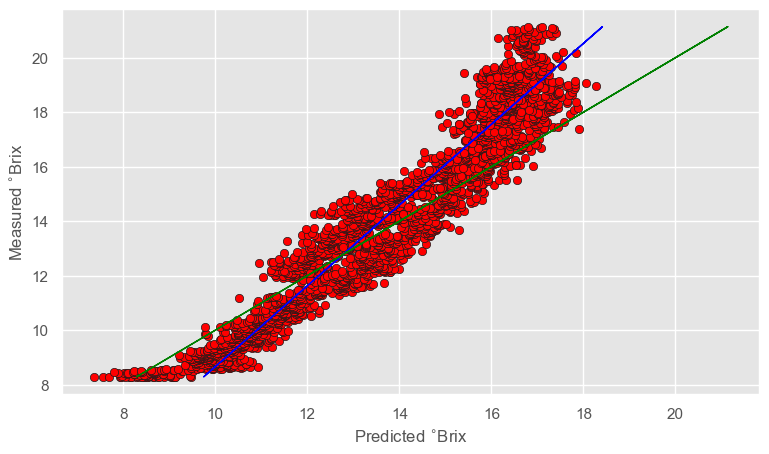

INFO Model loss : 2.0850561303245057
INFO Elapsed time for pipeline run : 15.87
INFO Pipeline end...
INFO ************************************


In [7]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files[0]

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting (Manual)
# read the file and create dataframe
import pandas as pd
data = pd.read_csv(dataset, sep=split_params['sep'])
data.set_index(split_params['index_column'])
X = data.drop(axis=1, columns=split_params['drop_columns'])  # drop the last column, so we have exactly 256 features
y = data[split_params['y_data_column']]

# Create X_train, X_test, y_train and y_test *** (BY INDICES) ***
split_ratio_train = 0.5
row_start_index_train, row_stop_index_train = 0, (split_ratio_train * X.shape[0])
row_start_index_test, row_stop_index_test = row_stop_index_train+1, X.shape[0]

X_train = X.iloc[int(row_start_index_train):int(row_stop_index_train),:]
y_train = y.iloc[int(row_start_index_train):int(row_stop_index_train)]
X_test = X.iloc[int(row_start_index_test):int(row_stop_index_test),:]
y_test = y.iloc[int(row_start_index_test):int(row_stop_index_test)]

# final data tuple
data = (X_train, X_test, y_train, y_test)

# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],        # only KFolds
    'preprocessor' : preprocessors[3],              # only SNV
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],                            # PLSR
    'evaluator' : evaluators[0],                    # MSE
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,     # set to True to show final prediction line of best fit
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start [PLSR | EXTRAPOLATION]...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

<h3 style="color: #00faaa">PLSR | Extrapolation (All 4 Files dataset) </h3>
<h5 style="color: white">Preprocessors - FIXED SNV</h5>
<h5 style="color: white">Train/Test split - FIXED 75/25 (3 files train / 1 file test)</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV</h5>
<h5 style="color: white">Spectrum - FIXED 4 days</h5>

INFO ************************************
INFO Pipeline Start [PLSR | EXTRAPOLATION]...
INFO Pipeline params :
INFO  , Preprocessor : snv, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 24
INFO [MODEL EVALUATION]




[Model Evaluation] MSE value between y_test and y_pred : 3.470


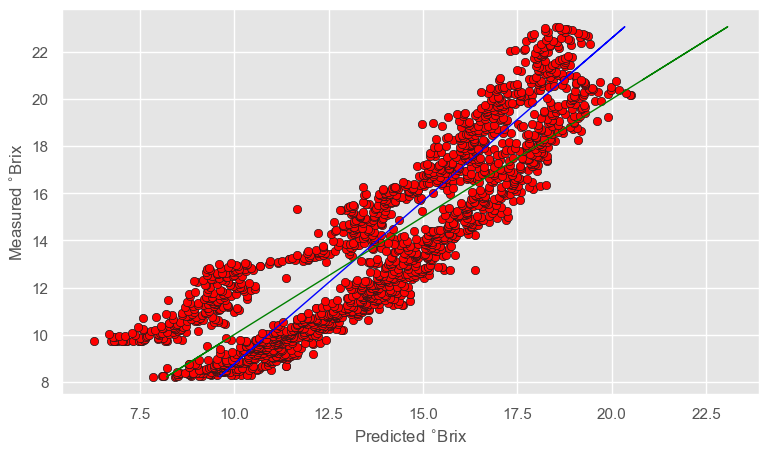

INFO Model loss : 3.469967138195141
INFO Elapsed time for pipeline run : 40.54
INFO Pipeline end...
INFO ************************************


In [5]:
# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting (Manual)
# read the file and create dataframe
import pandas as pd

# CREATING TRAINING DATASET
# read 3 files and create training dataframe
df_list = []
training_files = [files[0],files[1],files[2]]
for i, file in enumerate(training_files):
    dataset = pd.read_csv(file, sep=split_params['sep'])
    dataset.set_index(split_params['index_column'])
    df_list.append(dataset)
# concatenate them together
big_df = pd.concat(df_list, ignore_index=True)
X_train = big_df.drop(axis=1,
                      columns=split_params['drop_columns'])  # drop the last column, so we have exactly 256 features
y_train = big_df[split_params['y_data_column']]

# CREATING TEST DATASET
dataset = pd.read_csv(files[3], sep=split_params['sep'])
dataset.set_index(split_params['index_column'])
X_test = dataset.drop(axis=1, columns=split_params['drop_columns'])  # drop the last column, so we have exactly 256 features
y_test = dataset[split_params['y_data_column']]

# final data tuple
data = (X_train, X_test, y_train, y_test)

# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],        # only KFolds
    'preprocessor' : preprocessors[3],              # only SNV
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],                            # PLSR
    'evaluator' : evaluators[0],                    # MSE
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,     # set to True to show final prediction line of best fit
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start [PLSR | EXTRAPOLATION]...")
logger.info("Pipeline params :")
logger.info(" , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")